In [150]:
import re
import json
import math
from janome.tokenizer import Tokenizer


json_open = open("C:/Users/81906/Documents/create-chunk/history/historyk.json",mode="r",encoding="utf8")
json_load = json.load(json_open)
tokenizer = Tokenizer()
simi = []

def janome(sentense):
    ls = []
    for token in tokenizer.tokenize(sentense):
        if str(token.surface) != ' ':
            ls.append(str(token.surface).upper())            
    return ls

def calc_cos(dictA, dictB):
    """
    cos類似度を計算する関数
    @param dictA 1つ目の文章
    @param dictB 2つ目の文章
    @return cos類似度を計算した結果。0〜1で1に近ければ類似度が高い。
    """
    # 文書Aのベクトル長を計算
    lengthA = 0.0
    for key,value in dictA.items():
        lengthA = lengthA + value*value
    lengthA = math.sqrt(lengthA)

    # 文書Bのベクトル長を計算
    lengthB = 0.0
    for key,value in dictB.items():
        lengthB = lengthB + value*value
    lengthB = math.sqrt(lengthB)

    # AとBの内積を計算
    dotProduct = 0.0
    for keyA,valueA in dictA.items():
        for keyB,valueB in dictB.items():
            if keyA==keyB:
                dotProduct = dotProduct + valueA*valueB
    # cos類似度を計算
    cos = dotProduct / (lengthA*lengthB)
    return cos


def words_to_freqdict(words):
    """
    単語の配列を、単語と頻度の辞書に変換する関数
    例: ["X","X","Y","Z","X"] => {"X":3, "Y":1, "Z":1}
    @param words 単語の配列
    @return 単語と頻度の辞書
    """
    freqdict = {}
    for word in words:
        if word in freqdict:
            freqdict[word] = freqdict[word] + 1
        else:
            freqdict[word] = 1
    return freqdict


def main(text):
    global simi
    if text != "":
        docA = janome(text)
        docB = ["JAVSCRIPT","GOOGLE", "検索", "結果"]
        print(docA,text)

        freqdictA = words_to_freqdict(docA)
        freqdictB = words_to_freqdict(docB)

        cosAB = calc_cos(freqdictA,freqdictB)
        print(cosAB) # 0.134839972493 
        simi.append(cosAB)

with open("C:/Users/81906/Documents/actr6/actr6/distr-model/logs/results.txt",mode="r",encoding='utf8') as f:
    for line in f.readlines():
        line_split = (re.split( "/n| |t|T", line)[2])
        for i in range(len(json_load)):
            if json_load[i]['id'] == line_split:
                print(json_load[i]['title'])
                main(json_load[i]['title'])
                break

Google 検索オプション
['GOOGLE', '検索', 'オプション'] Google 検索オプション
0.5773502691896258
Latex 日本 - Google 検索
['LATEX', '日本', '-', 'GOOGLE', '検索'] Latex 日本 - Google 検索
0.4472135954999579
URLを指定したページのスクリーンショットを保存してくれる｢Page2Images｣ | ライフハッカー［日本版］
['URL', 'を', '指定', 'し', 'た', 'ページ', 'の', 'スクリーン', 'ショット', 'を', '保存', 'し', 'て', 'くれる', '｢', 'PAGE', '2', 'IMAGES', '｣', '|', 'ライフ', 'ハッカー', '［', '日本', '版', '］'] URLを指定したページのスクリーンショットを保存してくれる｢Page2Images｣ | ライフハッカー［日本版］
0.0
【CSS】意外と難しい「position」の使い方を詳しく解説してみた - アイデアハッカー
['【', 'CSS', '】', '意外と', '難しい', '「', 'POSITION', '」', 'の', '使い方', 'を', '詳しく', '解説', 'し', 'て', 'み', 'た', '-', 'アイデア', 'ハッカー'] 【CSS】意外と難しい「position」の使い方を詳しく解説してみた - アイデアハッカー
0.0
バナー広告とは？これを読めば全てが分かる！【徹底解説】 | Adell
['バナー', '広告', 'と', 'は', '？', 'これ', 'を', '読め', 'ば', '全て', 'が', '分かる', '！', '【', '徹底', '解説', '】', '|', 'ADELL'] バナー広告とは？これを読めば全てが分かる！【徹底解説】 | Adell
0.0
バナー広告とは？これを読めば全てが分かる！【徹底解説】 | Adell
['バナー', '広告', 'と', 'は', '？', 'これ', 'を', '読め', 'ば', '全て', 'が', '分かる', '！', '【', '徹底', '解説', '】', '|', '

In [145]:
import collections
for i in range(len(simi)):
    simi[i] = round(simi[i],1)
simi

[0.4,
 0.4,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.4,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.1,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.3,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.4,
 0.4,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.4,
 0.4,
 0.4,
 0.4,
 0.0,
 0.0,
 0.0,
 0.4,
 0.5,
 0.4,
 0.4,
 0.4,
 0.4,
 0.0,
 0.0,
 0.0,
 0.4,
 0.4,
 0.0,
 0.4,
 0.4,
 0.4,
 0.3,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.3,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.2,
 0.3,
 0.2,
 0.4,
 0.4,
 0.4,
 0.0,
 0.4,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.4,
 0.0,
 0.4,
 0.4,
 0.4,
 0.4,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.3,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.1,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.1,
 0.0

C:\Users\81906\anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


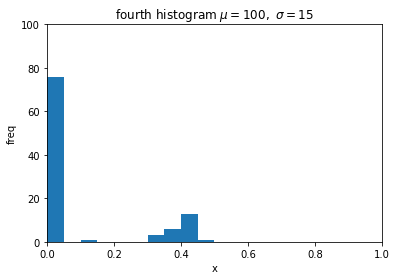

In [149]:
import numpy as np
import matplotlib.pyplot as plt

mu, sigma = 100, 15

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.hist(simi)
ax.set_title('fourth histogram $\mu=100,\ \sigma=15$')
ax.set_xlabel('x')
ax.set_ylabel('freq')
ax.set_xlim(0,1)
ax.set_ylim(0,100)
fig.show()


C:\Users\81906\anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


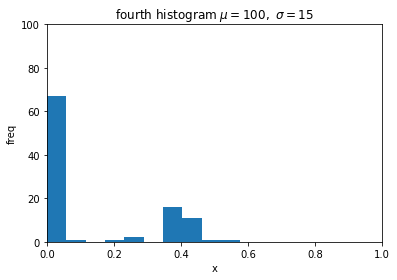

In [152]:
import numpy as np
import matplotlib.pyplot as plt

mu, sigma = 100, 15

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.hist(simi)
ax.set_title('fourth histogram $\mu=100,\ \sigma=15$')
ax.set_xlabel('x')
ax.set_ylabel('freq')
ax.set_xlim(0,1)
ax.set_ylim(0,100)
fig.show()
